Sveučilište u Zagrebu<br/>
Fakultet elektrotehnike i računarstva<br/>
Zavod za elektroničke sustave i obradbu informacija

Akademska školska godina 2022./2023.

**1. vježba: Očitavanje i spektralna analiza**

*Osnove obradbe signala* (183447, 223374)

Autor: Tomislav Petković

Datum: 2022-10-05

Molimo vas da komentare na ove upute (ispravke, primjedbe, prijedloge itd.) šaljete e-poštom na tomislav.petkovic.jr@fer.hr.

© Sveučilište u Zagrebu Fakultet elektrotehnike i računarstva, 2022.

Umnažanje i distribucija ovih uputa je dozvoljena samo ako svaka kopija sadrži gorenavedenu informaciju o autorskim pravima te ovu dozvolu o umnažanju.

# Uvod

Upute za prvu laboratorijsku vježbu iz predmeta *Osnove obradbe signala* su pripremljene u obliku <a href="https://jupyter.org/">Jupyterske</a> bilježnice.

Jupyterska bilježnica koristi <a href="https://ipython.org/">IPython</a> koji je interaktivni interpreter za Pyhton. Uobičajeni način korištenja bilježnice je kroz internetski preglednik. Pri tome preglednik može biti spojen na lokalnu bilježnicu, no isto tako se mogu koristiti udaljene bilježnice koje se izvršavaju na Googleovom Colaboratoryu.

Svi zadaci u ovoj bilježnici su dovoljno jednostavni tako da se mogu riješiti korištenjem <a href="https://colab.research.google.com">Googleovog Colaboratorya</a> (skraćeno Colab).

Svaki softver je samo alat. Sukaldno tome, osim Pythona slobodno smijete koristiti i druge alate kao što su <a href="https://www.mathworks.com/products/matlab.html">Matlab</a>, <a href="https://www.gnu.org/software/octave/index">GNU Octave</a> i <a href="https://www.scilab.org/">Scilab</a> kako bi riješili zadane zadatke. Napominjemo da korištenje drugih alata može značiti da vaš izvještaj s vježbe ne možete predati popunjavanjem ove bilježnice, odnosno da morate pripremiti novi pisani izvještaj. Dodatno, nastavnici vam mogu pomoći oko izrade vježbe samo ako koristite Colab i/ili Matlab.

## Upute za predaju izvještaja s vježbe

Ako rješavate vježbu u Pythonu korištenjem Colaba onda jednostavn upišite vaše odgovore u prazna polja, i to programski kod u polja za kod te odgovore na postavljena pitanja u tekstualna polja.

Prazna polja u koja upisujete programski kod sadrže zadani komentar: `# Upišite vaše rješenje`.

Tekstualna polja u koja morate upisati odgovore na postavljena pitanja sadrže masni tekst napisan velikim tiskanim slovima: **UPIŠITE VAŠ ODGOVOR**.

Jednom kada su svi zadaci riješeni ispunjenu bilježnicu pohranite u datoteku s imenom `JMBAG_IME_PREZIME_Vjezba_1.ipynb` te tu datoteku predajte pod odgovarajuću zadaću u FER-ovom Moodleu.

Predane bilježnice mogu biti automatski re-evaluirane što odgovara naredbi  *Restart and run all* u Colabu. Prema tome, svakako prije predaje vaše bilježnice pokrenite tu naredbu i provjerite ispravnost vaših rješenja.

Ako ste vježbu izradili korištenjem nekog drugog softvera koji nije kompatibilan s Jupyterskom bilježnicom onda morate pripremiti standardni pisani izvještaj s laboratorijske vježbe.

## Podaci o studentu

Molimo vas da prije ispunjavanja ostatka bilježnice dvaput kliknete na ovaj tekst te zatim upište vaše podatke:

Ime: **Ivan Klabučar**

Matični broj (JMBAG): **0036513702**

Također odmah promijenite ime datoteke u 0036513702_Ivan_Klabucar.ipynb.

## Preporučeno čitanje

Ako do sada niste koristili Python onda započnite s bilo kojim od kratkih uvoda za početnike kao što je npr. službeni tutorial dostupan na adresi <a href="https://docs.python.org/3/tutorial/">https://docs.python.org/3/tutorial/</a>.

Studentima dobro upoznatim s Matlabom koji su početnici u Pythonu se toplo preporuča da pročitaju dokument <a href="https://numpy.org/doc/stable/user/numpy-for-matlab-users.html">NumPy for Matlab users</a> prije rješavanja ove laboratorijske vježbe u Colabu.

## Uvoz potrebnih funkcija

Radi smanjivanja razlika između programskog koda u Pythonu i u Matlabu u ovoj bilježnici ćemo namjerno uvesti sve potrebne funkcije iz <a href="https://www.scipy.org/">SciPy</a>-ja, <a href="https://numpy.org/">NumPy</a>-ja i <a href="https://matplotlib.org/">Matplotlib</a>-a izravno u globalni imenik tako da možemo jednostavno pisati `fft` umjesto punog imena `scipy.fft.fft`.

Svakako imajte u vidu da je ovakav pristup uvjetno prihvatljiv radi pojednostavljenja koda za laboratorijske vježbe jer su rizici kolizije i neočekivanih nuspojava minimalni. Svakako ga je najbolje izbjegavati u produkcijskom kodu.

Ako preferirate korištenje imenika i punih imena funkcija onda slobodno izmijenite naredbe za uvoz funkcija tako da sve uvezene funkcije ostanu strogo razdvojene.

In [1]:
# Uvezi potrebne funkcije u globalni imenik
# numpy mora biti učitan prvi tako da njegove funkcije ne prikriju funkcije iz scipy.signal i scipy.fft
from numpy import *
from scipy.signal import *
from scipy.fft import *
from matplotlib.pyplot import *

# 1. Vremenski diskretni sinusoidalni signali

U ovoj laboratorijskoj vježbi istražujemo kako se računala koriste za numeričku analizu signala. Radi jednostavnosti koristitimo isključivo sintetičke signale. Kada generiramo sitnetički signal u NumPyju ili u Matlabu obično započinjemo s geneiranjem niza (vektora) koji sadrži vremenske korake, i to korištenjem naredbe [`numpy.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) u Pyhtonu ili korištenjem Matlabovog operatora [`:`](https://www.mathworks.com/help/matlab/ref/colon.html). Jednom kada smo generiraili niz odabranih vremenskih koraka na njih možemo primijeniti bilo koju funkciju radi računanja vrijednosti sintetičkog signala.

Imajte u vidu da za geneiranje vremenskih koraka koje koristimo za daljnje numeričko računanje svakako želimo generirati brojeve u dvostrukoj preciznosti. Takvo ponašanje je predodređeno u Matlabu, odnosno Matlabova naredba `0:1:99` generira niz brojeva od 0 do 99 s korakom 1 koji su spremljeni u dvostrukoj preciznosti. Isti niz u Pythonu generiramo s `numpy.arange(0, 100, 1)`, no ta naredba će gotovo sigurno generirati niz tipa `int64` pa zato uvijek koristite `numpy.arange(0.0, 100.0, 1.0)` (primijetite decimalnu točku). Uočite da `arange` za razliku od Matlabove `:` ne uključuje gornju granicu intervala u generirani interval. Također uočite drugačiji redoslijed argumenata: u Matlabu je korak zadan u sredini između početne i konačne vrijednosti dok je u Pythonu zadan kao zadnji argument.

## 1.A Generiranje vremenski diskretnih sinusoidalnih signala

Napišite funkciju koja generira vremenski diskretan sinusoidalni signal zadan jednadžbom $x[n]=A\sin(\omega_0 n + \varphi)$.

Parametri signala koji također moraju biti ulazni parametri tražene funkcije su amplituda $A$, kružna frekvencija $\omega$, faza $\varphi$ i broj uzoraka $N$.

Jedna moguća deklaracija tražene funkcije jest:

```
def oos_sin(omega = 1, N = 100, phi = 0, A = 1):
  # ovdje dolazi programski kod za računanje x-a
  return x
```

Uputa: Prvo generirajte niz koji sadrži sve $n$-ove korištenjem npr. 
`n = numpy.arange(0.0, N, 1.0)`, a zatim primijenite funkciju [`numpy.sin`](https://numpy.org/doc/stable/reference/generated/numpy.sin.html) na taj niz.

Napomena: Prvih nekoliko pitanja u ovoj bilježnici već imaju upisano rješenje. To rješenje jest tu da pomogne onima koji prvi put koriste Python. Također, dozvoljeno jest to upisano rješenje predati kao svoje, odnosno nije potrebno pisati nova rješenja koja bi bila značajno drugačija.

In [2]:
# Upišite vaše rješenje

# Jedno moguće rješenje
def oos_sin(omega = 1, N = 100, phi = 0, A = 1):
  n = arange(0.0, N, 1.0)
  x = A * sin(omega * n + phi)
  return x

## 1.B Crtanje vremenski diskretnih signala

Napišite funkciju koja crta generirani vremenski disretan signal korištenjem `stem` i `plot` naredbe unutar iste slike; želimo nacrtati točna mjesta uzorka signala naredbom `stem` i linije koje spajaju te uzorke naredbom `plot`.

Bilješka: Puna imena naredbi `plot` i `stem` u Pythonu su [`matplotlib.pyplot.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) i [`matplotlib.pyplot.stem`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.stem.html). Te naredbe su jako slične Matlabovim [`stem`](https://www.mathworks.com/help/matlab/ref/stem.html) i [`plot`](https://www.mathworks.com/help/matlab/ref/plot.html) naredbama.

Bilješka: Kada koristite `plot` i `stem` unutar ove bilježnice svako polje s kodom će imati svoj poseban prostor za iscrtavanje. Zadavanje višestrukih naredbi `plot` i/ili `stem` unutar jednog polja će samo dodavati elemente u postojeći prostor za iscrtavanje. Želite li razdvojiti nacrtano koristite naredbu [`matplotlib.pyplot.figure`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html).

In [3]:
# Upišite vaše rješenje

# Jedno moguće rješenje
def oos_nacrtaj(x):
  figure()
  plot(x)
  stem(x)

## 1.C Periodički vremenski diskretni signali

Vremenski diskretan signal $x[n]$ je periodičan ako postoji prirodan broj $P>0$ takav da vrijedi $x[n]=x[n+P]$.

Najmanji $P$ za koji to vrijedi se naziva temeljni period.

Za signale oblika $x[n]=A\sin\bigl(\omega_0 n + \varphi\bigr)$ je dobro poznato da samo neke određene vrijednosti kružne frekvencije $\omega_0$ definiraju vremenski diskretne signale perioda $P$.

Odredite uvjet kojeg $\omega_0$ mora zadovoljiti tako da signal $x[n]$ bude periodičan, odnosno da vrijedi $x[n]=x[n+P]$ gdje je $P$ cijeli broj.

Zatim za dva signala $x_1[n]$ i $x_2[n]$ za koje je $\omega_1=0.1\pi$ i $\omega_2=0.8\pi$ izračunajte temeljne periode $P_1$ i $P_2$ za koje su ti vremenski diskretni signali periodični, ako takvi periodi uopće postoje.

Naposlijetku, korištenjem koda iz prethodna dva zadatka (1.A i 1.B) nacrtajte točno dva perioda signala $x_1[n]$ i $x_2[n]$.

Uputa: Prvi dio zadatka riješite na papiru. Vaše rješenje na papiru ne trebate prepisivati u ovaj izvještaj; dovoljno je u komentar upisati dobivene vrijednosti za temeljne periode $P_1$ i $P_2$.

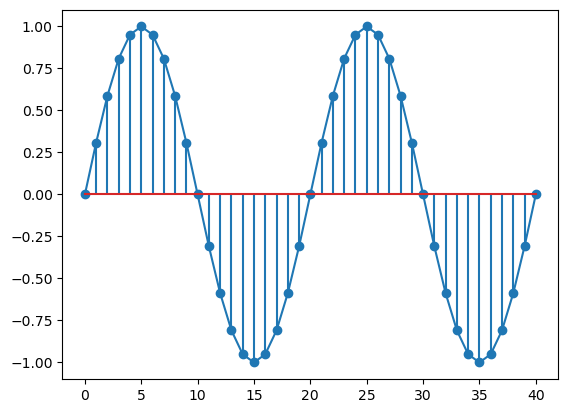

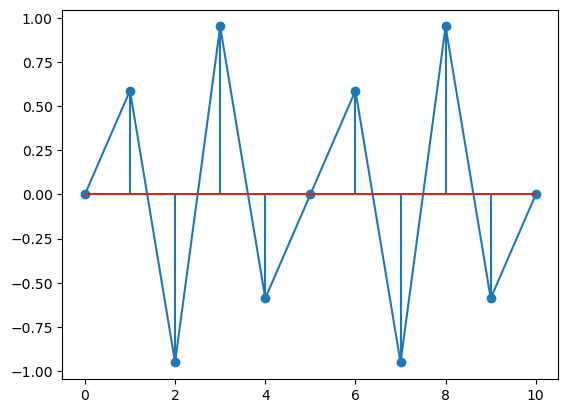

In [4]:
# frekvencija mora biti racionalan visekratnik od pi da bude diskretni periodicki signal
omega1 = 0.1 * np.pi
omega2 = 0.8 * np.pi
P1 = 20 # 2pi/0.1pi = 20 -> P1 = 20
P2 = 5 # 2pi/0.8pi = 2.5 -> prvi cijeli visekratnik 2.5 -> P2 = 5


signal_1 = oos_sin(omega1, 2*P1+1)
signal_2 = oos_sin(omega2, 2*P2+1)

oos_nacrtaj(signal_1)
oos_nacrtaj(signal_2)

## 1.D Višeznačnost vremenski diskretnih sinusoidalnih signala

Povećanje frekvencije $\Omega_0$ nekog vremenski kontinuiranog sinusoidalnog signala $x(t)=A\sin(\Omega_0t+\varphi)$ uvijek povećava broj oscilacija tog signala unutar bilo kojeg konačnog vremenskog intervala.

Isto svojstvo ne vrijedi za vremenski diskretne sinusoidualne signale oblika $x[n]=A\sin(\omega_0t+\varphi)$.

Neka su vrijednosti $\omega_0$ redom $0.1\pi$, $0.8\pi$, $\pi$, $1.2\pi$, i $1.9\pi$ te neka je broj uzoraka $N=20$.

Korištenjem koda iz prva dva zadatka (1.A i 1.B) prikažite svih pet zadanih vremenski diskretnih sinusoida.

Napomena: Kako sve računamo numerički korištenjem računala neke numeričke pogreške su očekivane, i to pogotovo za slučaj $\omega_0=\pi$.

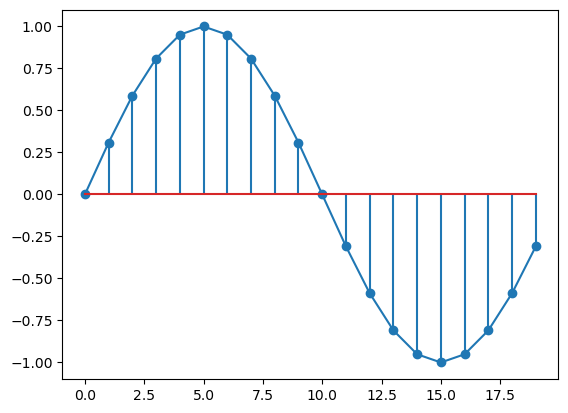

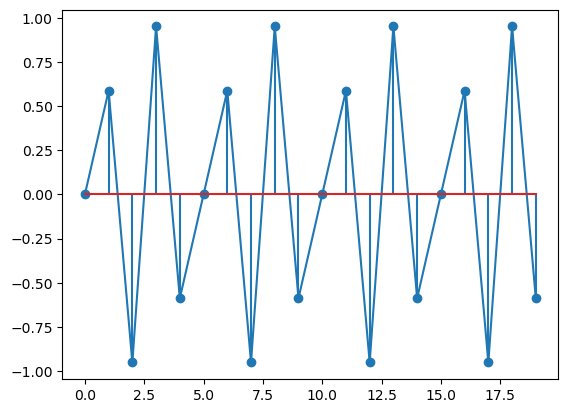

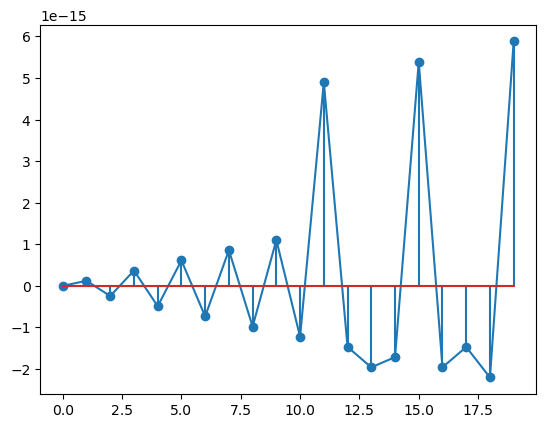

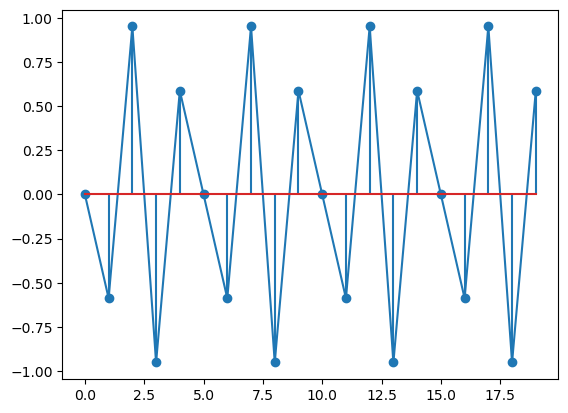

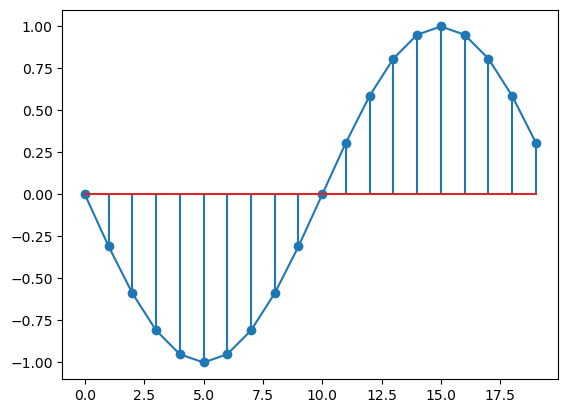

In [5]:
# Upišite vaše rješenje

# Jedno moguće rješenje (koje crta 20 uzoraka)
oos_nacrtaj( oos_sin(0.1*pi, N=20) )
oos_nacrtaj( oos_sin(0.8*pi, N=20) )
oos_nacrtaj( oos_sin(1.0*pi, N=20) )
oos_nacrtaj( oos_sin(1.2*pi, N=20) )
oos_nacrtaj( oos_sin(1.9*pi, N=20) )

Jednom kada ste nacrtali sve zadane signale odgovorite na sljedeća pitanja:

Postoji li neka veza između generiranih signala za $0<\omega<\pi$ i za $\pi<\omega<2\pi$?

zrcaljenjem grafa $\omega_0$=$0.1\pi$ preko x osi dobije se graf od $\omega_0$=$1.9\pi$, a <br>
zrcaljenjem grafa $\omega_0$=$0.8\pi$ preko x osi dobije se graf od $\omega_0$=$1.2\pi$

Odnosno grafovi $\omega_0$=$\pi - a$ i $\omega_0$=$\pi + a$, za $a < \pi$ su zrcalno simetricni u odnosu na x os.

Za koji interval kružnih frekvencija $\omega$ su generirani uzorci signala jednoznačni obzirom na zadanu frekvenciju?

**Za $[0 + a, 2\pi + a], za \;a \in 	\mathbb{R}$**

# 2. Generiranje i crtanje vremenski kontinuiranih sinusoidalnih signala

Na računalu možemo generirati isključivo vremenski diskretne signale.

Prilikom razmatranja procesa očitavanja uobičajeno želimo vizualizirati kako se uzorci ponašaju obzirom na neki polazni vremenski kontinuirani signal.

To možemo napraviti na način da na istoj slici nacrtamo vremenski diskretan i vremenski kontinuiran signal, gdje za prvog koristimo naredbu `stem`, a za drugog naredbu `plot`.

No pri tome moramo osigurati da su uzorci signala koje prosljeđujemo naredbi `plot` dovoljno gusti tako da ne možemo uočiti linearne segmente koje naredba crta na zaslonu, te da su uzorci očitani s periodom očitavanja koji značajno premašuje Nyquistov uvjet (frekvencija očitavanja je značajno brža/veća od Nyquistove frekvencije ili period očitavanja je značajno manji/kraći od Nyquistovog perioda).

## 2.A Generiranje sinusoidalnog signala

Neka je $T_s$ period očitavanja kojeg koristimo za očitavanje sinusoidalnog signala u $N$ točaka.

Napišite funkciju koja generira i koja vraća uzorke dva vremenski diskretna signala.

Prvi vremenski diskretni signal kojeg funkcija vraća jest sinusoidalni signal zadan jednadžbom $x_d[n]=A\sin(\Omega_0 n T_s⁡+\varphi)$ (vidi zadatak 1.A).

Drugi vremenski diskretni signal kojeg funkcija vraća sadrži uzorke vremenski kontinuiranog signala $x_c(t)=A\sin(\Omega_0 t+\varphi)$ koji su dobiveni korištenjem perioda očitavanja $T_c$ za kojeg sigurno ne dolazi do preklapanja spektra i koji je uz to značajno veći od $T_s$; jedna mogućnost jest odabrati period $T_c$ tako da generiramo barem 10 vremenski diskretnih uzoraka po jednom periodu očitavanja vremenski kontinuiranog signala.

Jedna moguća deklaracija tražene funkcije jest:

```
def oos_sin2(Omega = 1, N = 100, Ts = 1, phi = 0, A = 1):
  # ovdje dolazi programski kod za računanje signala
  return xd, td, xc, tc
```

Napomena: Vremena očitavanja za dva generirana signala su različita pa stoga funkcija uz vraćanje dva niza koja sadrže uzorke signala mora dodatno vratiti dva niza koja sadrže točne trenutke očitavanja signala; bez informacije o trenutcima očitavanja oba signala te signale nije moguće nacrtati na istoj slici.

In [6]:
# Upišite vaše rješenje

# Jedno moguće rješenje
def oos_sin2(Omega = 1, N = 100, Ts = 1, phi = 0, A = 1):
  Tc = 0.1 * Ts;
  if np.pi/Omega/10 < Tc:
    Tc = np.pi/Omega/10
  t_max = Ts * N;
  td = np.arange(0.0, t_max, Ts)
  xd = A * np.sin(Omega * td + phi)
  tc = np.arange(0.0, t_max, Tc)
  xc = A * np.sin(Omega * tc + phi)
  return xd, td, xc, tc

## 2.B Crtanje sinusoidalnog signala

Jednom kada smo generirali oba signala, uzorkovani signal i dovoljno dobru aproksimaciju polaznog vremenski kontinuiranog signala, možemo ih nacrtati na istoj slici.

Napišite funkciju koja crta uzorke oba signala koja smo generirali u zadatku 2.A na istoj slici. Prvi uzorci koji odgovaraju signalu $x_d[n]$ moraju biti nacrtani naredbom `stem`, a drugi uzorci koji odgovaraju signalu $x_c(t)$ moraju biti nacrtani naredbom `plot`.

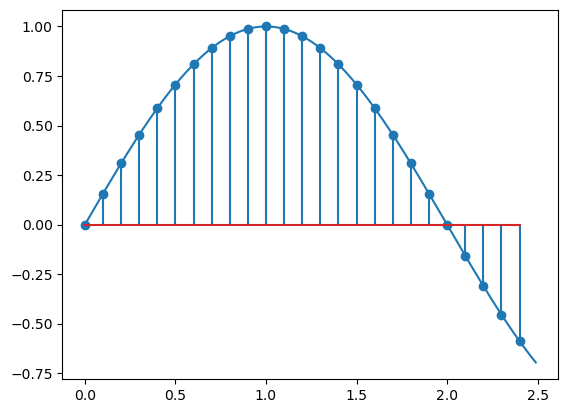

In [7]:
# Upišite vaše rješenje

# Jedno moguće rješenje
def oos_nacrtaj2(xd, td, xc, tc):
  figure()
  plot(tc, xc)
  stem(td, xd)

# Test
oos_nacrtaj2( *oos_sin2(pi/2, 25, 0.1) )

## 2.C Vizualizacija procesa očitavanja

Neka broj uzoraka bude $N=10$ i neka period očitavanja bude $T_s=0.1$.

Korištenjem koda iz zadataka 2.A i 2.B prikažite uzorke i polazni vremenski kontinuirani signal za sve frekvencije $\Omega_0$ iz niza $2\pi$, $8\pi$, $12\pi$, $18\pi$, i $22\pi$.

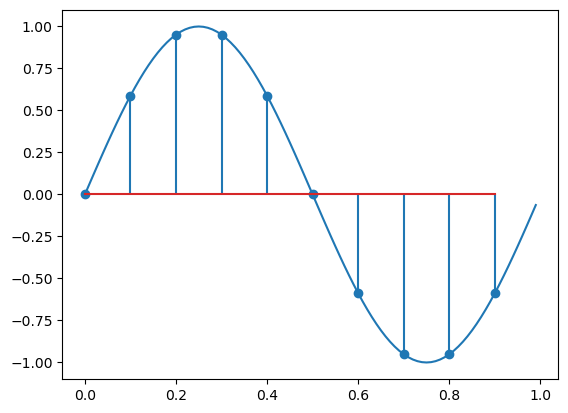

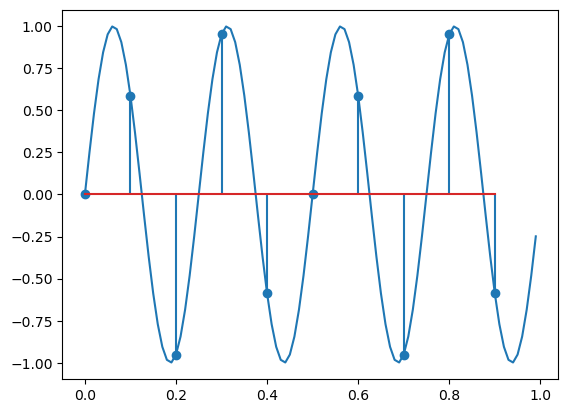

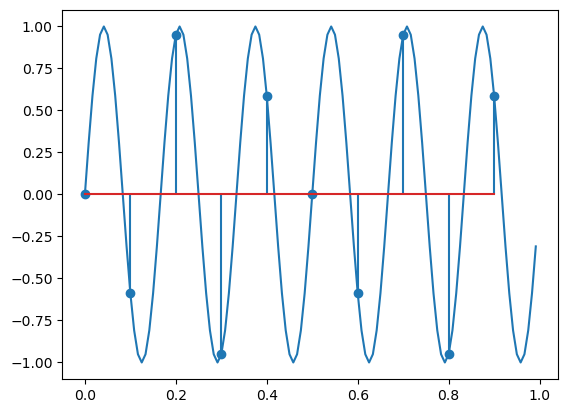

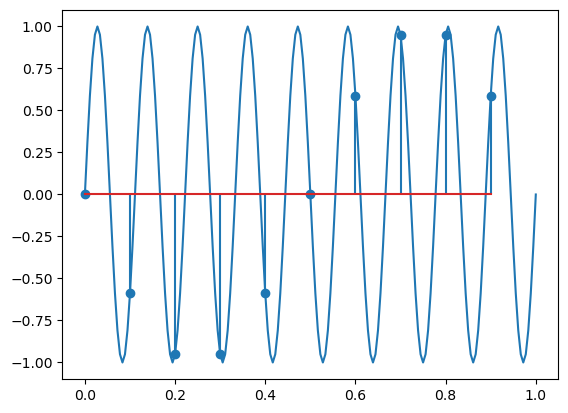

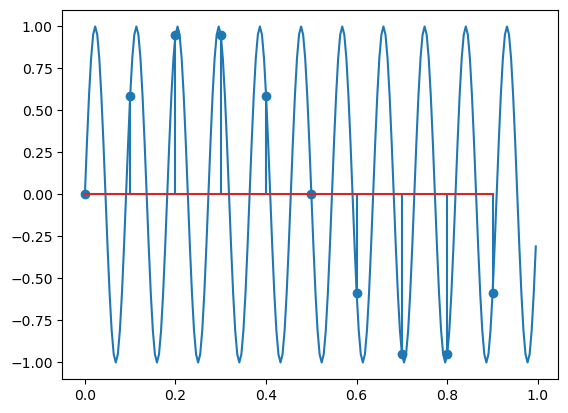

In [8]:
# Upišite vaše rješenje

# Jedno moguće rješenje
oos_nacrtaj2( *oos_sin2(2*pi, 10, 0.1) )
oos_nacrtaj2( *oos_sin2(8*pi, 10, 0.1) )
oos_nacrtaj2( *oos_sin2(12*pi, 10, 0.1) )
oos_nacrtaj2( *oos_sin2(18*pi, 10, 0.1) )
oos_nacrtaj2( *oos_sin2(22*pi, 10, 0.1) )

# 3. DFT, DTFT i spektralna analiza

Diskretna Fourierova transformacija (DFT) u $N$ točaka je standardni alat koji se koristit za analizu signala na računalu. Dodatna prednost korištenja diskretne Fourierove transformacije jest mogućnost njenog efikasnog računanja. 

DFT u $N$ točaka vremenski diskretnog signala $x[n]$ konačne duljine od $N$ uzoraka jest $$X[k]=\sum_{n=0}^{N-1}x[n]W_N^{nk},$$ gdje je $$W_N^{nk}=\exp\Bigl(-2\pi j{nk\over N}\Bigr)$$ kompleksna eksponencijala i gdje je $X[k]$ spektar signala.

Signal rekonstruiramo iz njegovog spektra korištenjem izraza $$x[n]=\sum_{k=0}^{N-1}X[k]W_N^{-nk}.$$

Oba navedena izraza se mogu izračunati izravno uz složenost $O(N^2)$ u broju operacija množenja i zbrajanja, no ako koristimo algoritam brze Fourierove transformacije onda nam posebna struktura transformacijske matrice pridružene DFT-u omogućava nam efikasnije računanje uz složenost $O(N\log N)$.

Brza Fourierova transformacija je dostupna i u SciPyju ([`scipy.fft`](https://docs.scipy.org/doc/scipy/reference/fft.html)) i u Matlabu. Oba alata koriste ista imena funkcija: `fft` se koristi za računanje DFT-a, a `ifft` se koristi za računanje inverznog DFT-a. Puna imena funkcija u SciPyju su [`scipy.fft.fft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html) i [`scipy.fft.ifft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.ifft.html). Želite li znati više svakako usporedite tu dokumentaciju s Matlabovom dokumentacijom za [`fft`](https://www.mathworks.com/help/matlab/ref/fft.html) i [`ifft`](https://www.mathworks.com/help/matlab/ref/ifft.html).

## 3.A Izravno numeričko računanje DTFT-a u K točaka

Neka je $x[n]$ vremenski diskretni signal konačne duljine $L$.

Napišite funkciju koja izravno računa vrijednosti od $\text{DTFT}\bigl[x[n]\bigr]$ u točno $K$ jednoliko raspoređenih frekvencija na intervalu $\langle 0,2\pi\rangle$ korištenjem prvih $N$ uzoraka signala. Ako je $N<L$ onda je signal potrebno skratiti odbacivanjem viška, dakle ne koristimo dodatne uzorke, a ako je $L<N$ onda za sve nedostajuće uzorke podrazumijevamo da su jednaki nuli.

Jedna moguća deklaracija tražene funkcije jest:

```
def oos_dtft(x, N, K):
  # ovdje dolazi kod za računanje uzoraka DTFT-a
  return X
```

Uputa: Prisjetite se da je DTFT signala $x[n]$ definirana kao $$X(\omega)=\sum_{n=-\infty}^{+\infty}x[n]e^{j\omega n}.$$ Kako je prema uvjetu zadataka signal konačnog trajanja zbroj se mijenja u konačan od $0$ do $N-1$. Dodatno, kako želimo jednoliko uzorkovati frekvenciju $\omega$ u $K$ uzoraka imamo $\omega=k{2\pi\over K}$. Uz ta dva uvjeta dobivamo $$X(k{\textstyle{2\pi\over K}})=\sum_{n=0}^{L-1}x[n]e^{-jk{2\pi\over K}n}.$$ Prema tome, u traženoj funkciji možemo prvo generirati niz indeksa koji sadrži `k` kojeg zatim koristimo za računanje uzoraka frekvencije `omega`. Iteriranjem preko svih uzoraka frekvencije `omega` te preko svih ulaznih uzoraka dobivamo tražene uzorke DTFT-a u $K$ točaka.

In [9]:
# Upišite vaše rješenje
def oos_dtft(x, N, K):
    X = np.zeros(K, dtype=np.cdouble)
    for k in range(K):
        for n in range(min(len(x), N)):
            X[k] += x[n] * np.exp(-1j * k * 2 * np.pi * n / K)# X[k] se zapravo odnosi na X(k*2*np.pi/K)
    return X

## 3.B Efikasno numeričko računanje DTFT u K točaka

Neka je $x[n]$ vremenski diskretni signal konačne duljine $N$.

Napišite funkciju koja korištenjem `fft` računa vrijednosti $\text{DTFT}\bigl[x[n]\bigr]$ u $K$ jednoliko raspoređenih frekvencija.

Uputa: Usporedite izraz u dokumentaciji funkcije `fft` s izrazom u uputi prethodnog zadatka. Zatim ispravno identificirajte koje vrijednosti morate proslijediti funkciji `fft` kako bi izračunali uzorke DTFT-a.

Bilješka: Usporedite vrijeme izvršavanja ove funkcije i one iz zadatka 3.A.

In [10]:
# Upišite vaše rješenje
def oos_fft(x, N, K):
    return fft(x, n=K)

# Ne moze se bas positici da se racuna ista stvar s fft funkcijom jer nema distinkcije 
# izmedu razlicitnog N i K parametra, odnosno N i K parametri u fft funkciji moraju biti isti broj
# Iz dokumentacije: y[k] = np.sum(x * np.exp(-2j * np.pi * k * np.arange(n)/n))

import time
x = oos_sin(N=100)


start = time.time()
X = oos_fft(x, 100, 100)
end = time.time()
print(f"Proslo je {end - start}s za izracun oos_fft")


start = time.time()
X = oos_dtft(x, 100, 100)
end = time.time()
print(f"Proslo je {end - start}s za izracun oos_dtft")



Proslo je 0.00031113624572753906s za izracun oos_fft
Proslo je 0.016350984573364258s za izracun oos_dtft


## 3.C Crtanje amplitudnog i faznog spektra

Jednom kada su izračunati uzorci DFT ili DTFT spektara iste želimo vizualizirati što uobičajeno radimo crtanjem amplitudnog i faznog spektra.

Amplitudni spektar možemo dobiti korištenjem funkcije `abs` u NumPyju i u Matlabu (primijetite da je `abs` skraćeni poziv funkcije [`numpy.absolute`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html)).

Fazni spektar je argument ili kut kompleksnog broja koji može biti izračunat korištenjem funkcije `angle`. Puno ime funkcije u NumPyju jest [`numpy.angle`](https://numpy.org/doc/stable/reference/generated/numpy.angle.html), usporedite tu funkciju s Matlabovom [`angle`](https://www.mathworks.com/help/matlab/ref/angle.html). Standardna funkcija `angle` računa kut kompleksnog broja unutar temeljnog intervala $\langle-\pi,\pi\rangle$ i pri tome ne premata fazu kako bi smanjila broj faznih skokova od $2\pi$ kada prelazimo kut $\pm\pi$. Kako bi odmotali fazu i smanjili broj faznih skokova koristite funkciju `unwrap` u NumPyju ([`numpy.unwrap`](https://numpy.org/doc/stable/reference/generated/numpy.unwrap.html)) i u Matlabu ([`unwrap`](https://www.mathworks.com/help/matlab/ref/unwrap.html)).

Također možemo izračunati realni i imaginarni dio spektra korištenjem funkcija  `real` i `imag`. Puna imena tih funkcija u NumPyju su [`numpy.real`](https://numpy.org/doc/stable/reference/generated/numpy.real.html) i [`numpy.imag`](https://numpy.org/doc/stable/reference/generated/numpy.imag.html).

Napišite dvije funkcije koje crtaju amplitudni spektar, fazni spektar, realni dio kompleksnog spektra i imaginarni dio kompleksnog spektra, sve unutar jedne slike jedno iznad drugoga; prva funkcija vizualizira spektar za DFT, a druga za DTFT. Spektre za DFT crtajte naredbom `stem`, a izračunate uzorke DTFT spektara crtajte naredbom `plot`. Također primijetite da frekvencijska os za DFT prikazuje indeks $k$, dok za DTFT frekvencijska os prikazuje frekvenciju $\omega$.

[ 1.95520948-0.j          3.15150579+0.59499462j -3.07347931-1.11852071j
 -0.63902804-0.30459382j -0.30143612-0.11849219j -0.23033412-0.j
 -0.30143612+0.11849219j -0.63902804+0.30459382j -3.07347931+1.11852071j
  3.15150579-0.59499462j]


/var/folders/2l/w_s2f2_j0y58gm69gshp8p140000gq/T/ipykernel_24744/3005564458.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/2l/w_s2f2_j0y58gm69gshp8p140000gq/T/ipykernel_24744/3005564458.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


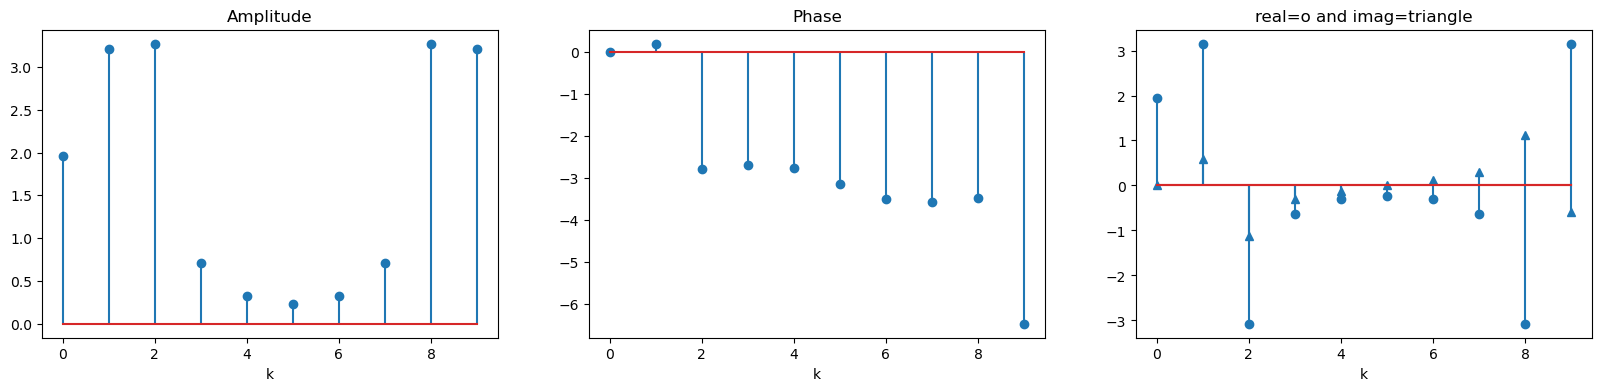

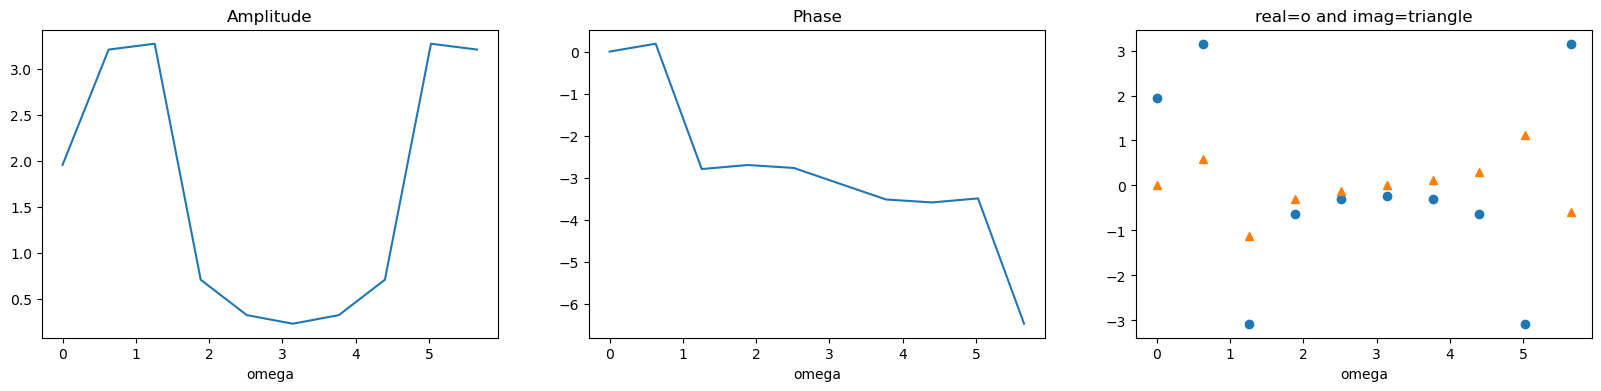

In [11]:
# Upišite vaše rješenje
rcParams['figure.figsize'] = [20, 4]
def plot_dft(X):
    amp = np.abs(X)
    ph = np.unwrap(np.angle(X))
    fig, axis = subplots(1, 3)
    axis[0].stem(amp)
    axis[0].title.set_text('Amplitude')
    axis[0].set_xlabel('k')
    axis[1].stem(ph)
    axis[1].title.set_text('Phase')
    axis[1].set_xlabel('k')
    axis[2].stem(np.real(X), markerfmt='o')
    axis[2].stem(np.imag(X), markerfmt='^')
    axis[2].title.set_text('real=o and imag=triangle')
    axis[2].set_xlabel('k')
    fig.show()


def plot_dtft(X):
    x_axis = (2*np.pi / len(X)) * np.arange(len(X))
    amp = np.abs(X)
    ph = np.unwrap(np.angle(X))
    fig, axis = subplots(1, 3)
    axis[0].plot(x_axis, amp)
    axis[0].title.set_text('Amplitude')
    axis[0].set_xlabel('omega')
    axis[1].plot(x_axis, ph)
    axis[1].title.set_text('Phase')
    axis[1].set_xlabel('omega')
    axis[2].plot(x_axis, np.real(X), 'o')
    axis[2].plot(x_axis, np.imag(X), '^')
    axis[2].title.set_text('real=o and imag=triangle')
    axis[2].set_xlabel('omega')
    fig.show()

X = oos_fft(x, 10, 10)
plot_dft(X)
plot_dtft(X)
print(X)

## 3.D Računanje i crtanje DFT-a signala konačne duljine

Neka je $x[n]=\{\underline{1},1,0,0.5\}$ signal konačne duljine od $L=4$ uzorka. Iskoristite funkcije iz prethodnih zadataka 3.A do 3.C da izračunate i vizualizirate sljedeće spektre: $\text{DFT}_{4}$, $\text{DFT}_{16}$, $\text{DFT}_{1024}$ i $\text{DTFT}$ uzorkovan u $K=1024$ točke.

/var/folders/2l/w_s2f2_j0y58gm69gshp8p140000gq/T/ipykernel_24744/3005564458.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/2l/w_s2f2_j0y58gm69gshp8p140000gq/T/ipykernel_24744/3005564458.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


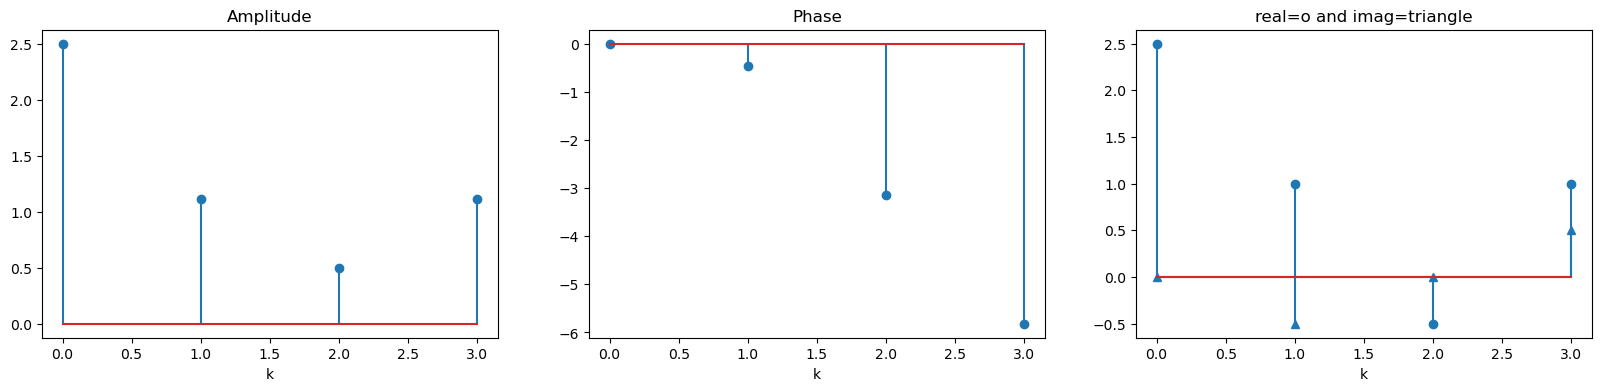

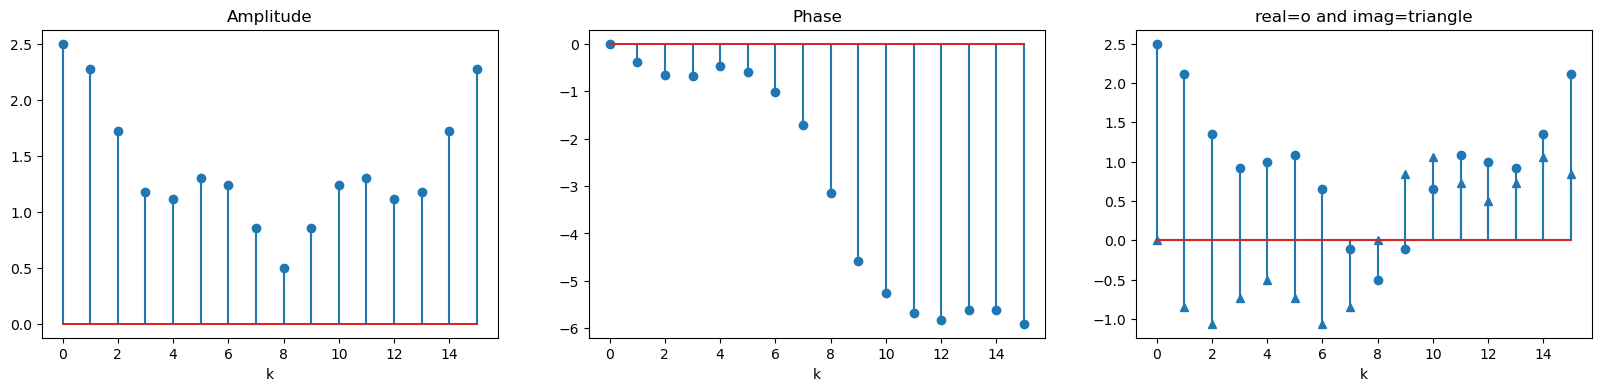

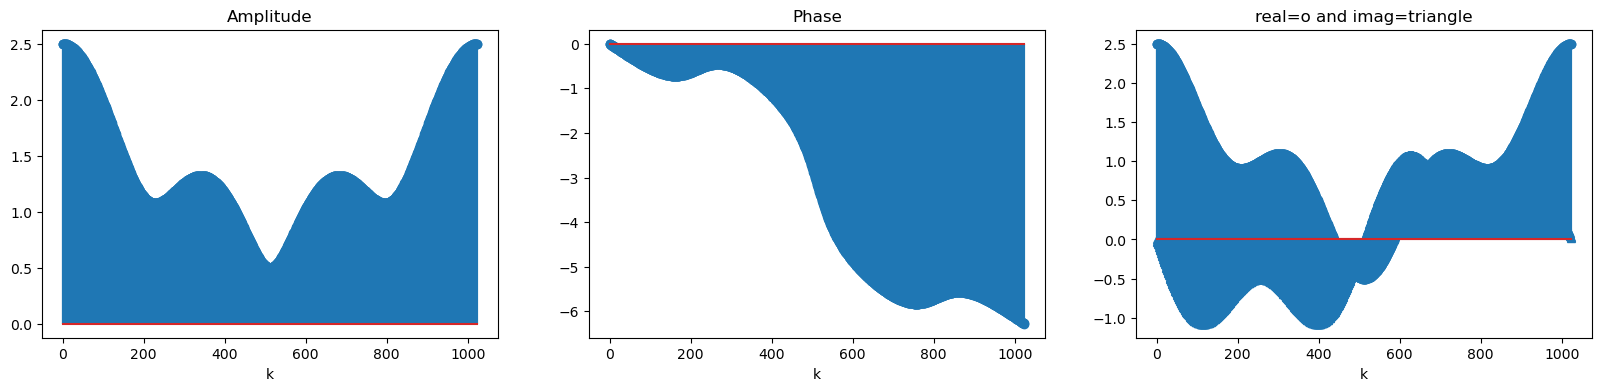

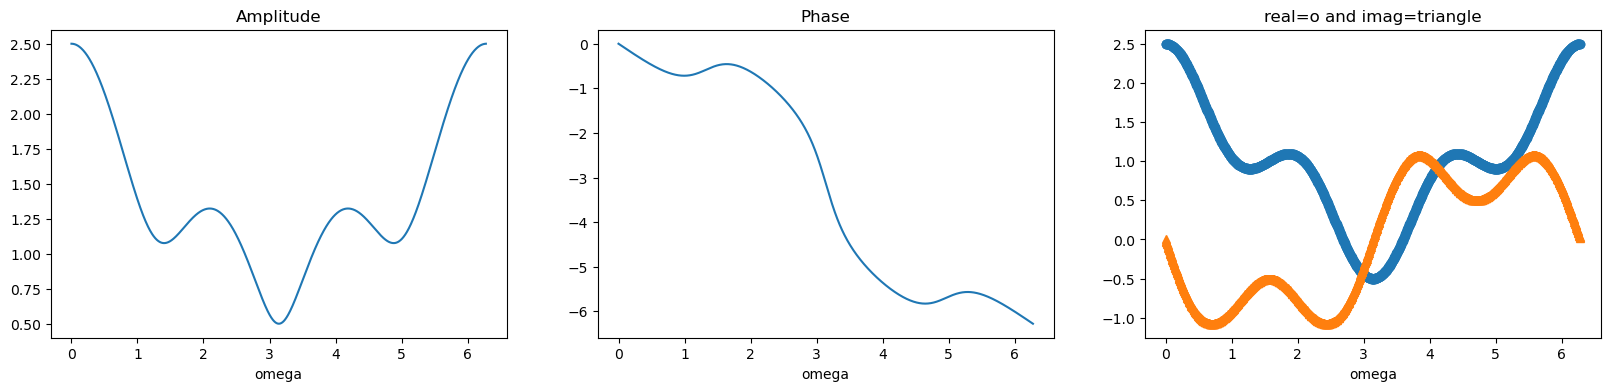

In [12]:
# Upišite vaše rješenje
x = [1, 1, 0, 0.5]
X_4 = oos_fft(x, 4, 4)
plot_dft(X_4)
X_16 = oos_fft(x, 16, 16)
plot_dft(X_16)
X_1024 = oos_fft(x, 1024, 1024)
plot_dft(X_1024)
plot_dtft(X_1024)

# 4. Razmazivanje spektra (neobavezno)

**Ovaj dio vježbe nije obavezan; riješite ga ako želite znati više.**

Usporedimo li izračunati DFT spektar segmenta konačnog trajanja nekog signala  sa očekivanim DTFT spektrom idealnog signala vrlo brzo uočavamo da izračunati DFT spektar sadrži spektralne komponente kojih nema u DTFT spektru.

Ta razlika u spektrima je uzrokovana *skraćivanjem* signala na neki *konačan interval*, i nešto je što ne možemo izbjeći u praksi jer računala mogu raditi samo sa signalima konačne duljine.

Takvo skraćivanje možemo modelirati kao množenje signala $x[n]$ s pravokutnim vremenskim otvorom $w_L[n]$, odnosno $$x_L[n]=x[n]\cdot w_L[n],$$ gdje je vremenski otvor funkcija koja odabire prvih $L$ uzoraka signala od $0$ do $L-1$ te koja sve ostale uzorke postavlja u nulu. U spektralnoj domeni ova operacija množenja postaje konvolucija između odgovarajućih spektara, dakle $$X_L(\omega)=X(\omega)*W_L(\omega).$$ Tu konvoluciju možemo interpretirati kao razmazivanje idealnog spektra preko spektra vremenskog otvora jer je konačni efekt da spektar signala gubi svoju oštrinu. U općem slučaju spektar je oštriji što je duljina vremenskog otvora $L$ veća. U graničnom slučaju kada $L\to\infty$ vremenski otvor $w_L[n]$ postaje jedinična konstanta, $w_L[n]=1$. Spektar jedinične konsntate jest Diracova distribucija $\delta(\omega)$ koja je neutralni element za konvoluciju, odnosno $X(\omega)*\delta(\omega)=\delta(\omega)*X(\omega)=X(\omega)$, te nema gubitka oštrine.

## 4.A Generiranje segmenta vremenski diskretne kosinusoide

Neka je $x[n]=\cos(2\pi{m\over P}n)$ periodična vremenski diskretna kosinusoida s periodom $P$ te neka je $m$ cijeli broj za koji vrijedi $0\le m\le {P\over2}-1$. Napišite funkciju koja generira niz od $L$ uzoraka signala za zadane parametre $m$ i $P$.

In [13]:
# Upišite vaše rješenje

## 4.B Spektar vremenski diskretne periodične kosinusoide

Neka je $P=L=N=10$ ($N$ je broj uzoraka ili duljina DFT-a).

Korištenjem funkcija iz zadatka 4.A generirajte signale za m=2 i za m=5. Zatim nacrtajte generirane signale.

In [14]:
# Upišite vaše rješenje

Za svaki od dva generirana signala korištenjem funkcije iz zadataka 3.B i funkcije `fft` izračunajte njihove spektre, točnije izračunajte $\text{DTFT}$ transformaciju u $K=128$ točaka i $\text{DFT}_{10}$ transformaciju u 10 točaka. Izračunate spektre skicirajte korištenjem funkcije iz zadatka 3.C.

In [15]:
# Upišite vaše rješenje

Kako vrijednost parametra $m$ utječe na spektre?

**UPIŠITE VAŠ ODGOVOR**


Sada nacrtajte fazni i amplitudni spektar $\text{DFT}_{10}$ transformacije signala za $P=L=N=10$ i za $m=1$.

In [16]:
# Upišite vaše rješenje

Što se dogodilo s faznim spektrom?

**UPIŠITE VAŠ ODGOVOR**


## 4.C Spektar segmenta vremenski diskretne kosinusoide

Neka je $P=L=N=10$ i neka je $m=1.4$ (primijetite da $m$ više nije cijeli broj).

Korištenjem funkcija iz zadatka 4.A generirajte taj signal pa ga zatim skicirajte. Nakon toga korištenjem funkcije iz zadataka 3.B i funkcije `fft` izračunajte spektar signala, točnije izračunajte $\text{DTFT}$ transformaciju u $K=128$ točaka i $\text{DFT}_{10}$ transformaciju u 10 točaka. Izračunate spektre skicirajte korištenjem funkcije iz zadatka 3.C.

In [17]:
# Upišite vaše rješenje

Vidimo li u spektru jednu čistu spektralnu komponentu koja odgovara sinusoidi (kosinusoidi) ili vidimo više od jedne komponente? Objasnite!

**UPIŠITE VAŠ ODGOVOR**

U zadatku 4.B amplitudni spektar $\text{DFT}_{10}$ sadrži samo očekivane dvije frekvencijske komponente koje odgovaraju sinusoidi (kosinusoidi), no $\text{DTFT}$ izračunat u $K=128$ točaka sadrži puno više frekvencijskih komponenti od očekivane dvije. Koji uvjet(e) moraju zadovoljavati $P$, $L$ i $m$ da bi spektar signala $x[n]=\cos(2\pi{m\over P}n)$ koji je očitan u $L$ točaka, a koji spektar računamo $\text{DFT}_{L}$ transformacijom, bio takav da amplitudni spektar sadrži točno dvije frekvencijske komponente različite od nule?

**UPIŠITE VAŠ ODGOVOR**

Koliko je vjerojatno da gornji uvjet bude zadovoljen u praksi?

**UPIŠITE VAŠ ODGOVOR**